### Team Members
1) Ramirez Sevilla Javier (N2401067F@e.ntu.edu.sg)
2) Zhou Runhe (zh0012he@e.ntu.edu.sg)
3) Samuel Chan (c240193@e.ntu.edu.sg)
4) Sheryl Ng Wenhui (sher0131@e.ntu.edu.sg)
5) Vijaya Madhulika (VIJA0021@e.ntu.edu.sg)

### Background

> 6000 students had already been organized into 120 tutorial groups, each consisting of 50 students

### The Goal of the Project

> To organise each tutorial group into teams of 5, striving for balanced and diverse team compositions, considering the following factors, School Affiliation, Gender and Current cGPA

> Note: Some tolerance is acceptable if the tutorial group is dominated by students from the same background or profile.

<hr>

# Planning Stage

## Step 1 - Analysis of Given Data

> User has to key in the tutorial group number to obtain the graphs generated for each tutorial group

> Gender: % Pie Chart; School affiliation: Type Bar Chart; cGPA: Line Graph

Graphs for G-1


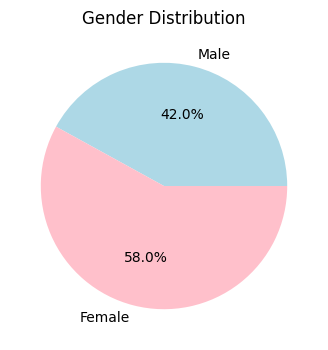

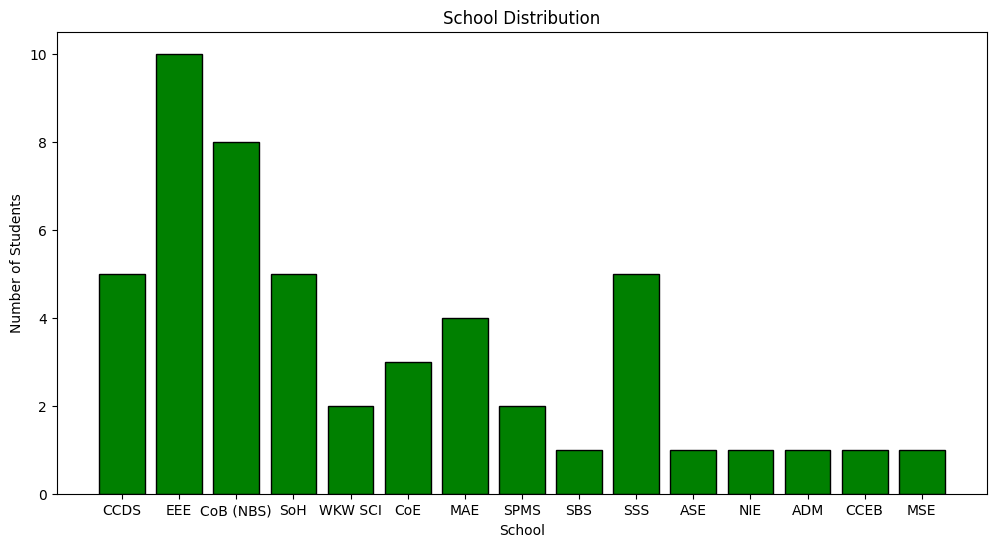

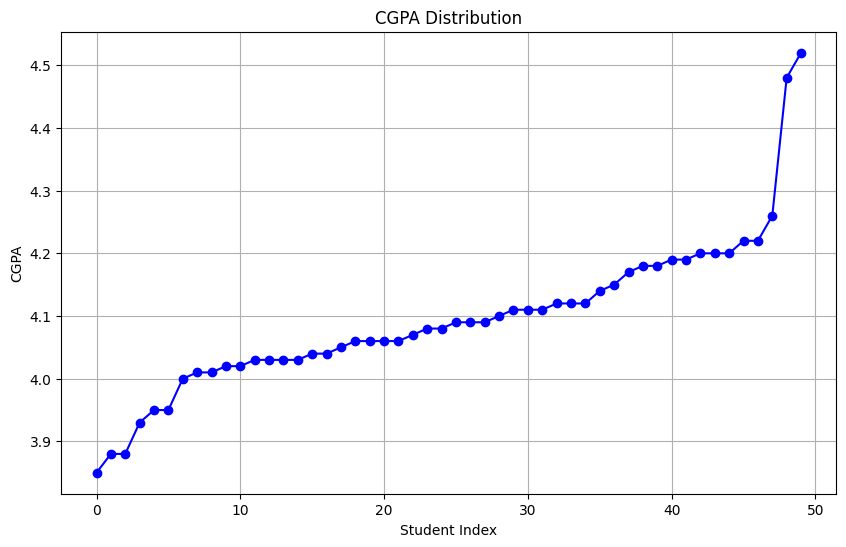

In [4]:
# Step 1: importing necessary modules
import matplotlib.pyplot as plt #generate graphs and visualisations

# Step 2: Read and load the data from 'records.csv'
with open('assets/records.csv', 'r') as file: #opens csv file in read mode 
    #The readlines() method reads all lines at once from the file into a list
    lines = file.readlines() 
    #Header contains the 1st row of the csv file which is a list of column names 
    header = lines[0].strip().split(',')
    #Initializes an empty list to store the parsed data
    data = [] 
    #For Loop that creates a dictionary where each column name from the header is matched with its corresponding value 
    for line in lines[1:]: # starts with index 1 as it ignores the data from the header
    # Removes any trailing whitespace from the current line and splits the line into individual values
        values = line.strip().split(',')
        row_dict = {} #stores key-value pairs
        #loop iterates over the header list, mapping each column name to its value
        for i in range(len(header)): 
            row_dict[header[i]] = values[i]
        data.append(row_dict) #appends the newly created row_dict dictionary to the data list.

# Step 3: Get user input for the tutorial group
# prompts user to enter tutorial group 
group_name = input("Enter the tutorial group: ").strip()


# Step 4: Filter the data for the selected tutorial group
#function filter_group filters data for a specific tutorial group
def filter_group(data, group_name):
    #iteration over each row in data only returns the values where tutorial group == group_name
    return [row for row in data if row['Tutorial Group'] == group_name]
#filtered data is stored in the group_data variable
group_data = filter_group(data, group_name)
#if group_data is empty i.e no matching tutorial group is found
if not group_data:
    print(f"No data found for group '{group_name}'. Please key in valid group name.")
    exit()  #Exit if no data found for the given group


# Step 5: Plot Gender Distribution as a % Pie Chart
#function gender_distribution creates a pie chart showing gender distribution in % 
def gender_distribution(group_data):
#Initializes a dictionary to count the number of Male and Female students.
    gender_counts = {'Male': 0, 'Female': 0} 
    #for loop that iterates over each row in the group_data list, going through every student in the filtered group
    for row in group_data:
        #Count each gender occurrence accessing the key 'Gender' in dictionary and corresponding value
        gender_counts[row['Gender']] += 1  
    # creates a new plot canvas of size 4x4 inches 
    plt.figure(figsize=(4, 4))
    # plt.pie(..) creates a pie chart 
    plt.pie(
        gender_counts.values(), #values to be displayed as pie slices
        labels=['Male', 'Female'],  #Manually specify labels of the pie slices
        autopct='%1.1f%%',  #Show percentage of each pie slice with 1 decimal
        colors=['Lightblue', 'Pink']  # Specify Colors for male and female respectively
    )
    #Adds a title to the pie chart 
    plt.title(f"Gender Distribution")
    plt.show() #displays the pie chart 


# Step 6: Plot School Affiliation Distribution as a Bar Graph
# function school_affliation creates a pie chart showing school distribution in % 
def school_affiliation(group_data):
    # Initializes an empty dictionary to store the count of students from each school.
    school_counts = {}
    # starts a for loop that iterates over each item (or row) in the group_data list, going through every student in the filtered group
    for row in group_data:
        # loop where the program is iterating through each student in group_data accessesing the value associated with the 'School' key in the row dictionary.
        school = row['School']
        # retrieves current count for the school if it exists and increments count
        school_counts[school] = school_counts.get(school, 0) + 1 # Count each school
    # Bar Graph
    plt.figure(figsize=(12, 6)) # Increase figure width for spacing
    plt.bar(school_counts.keys(), school_counts.values(), color='green', edgecolor='black') # plots a bar chart for different schools for selected groups.
    plt.xlabel('School')  
    plt.ylabel('Number of Students') #labels of graphs
    plt.title(f'School Distribution')
    plt.show()

# Step 7: Plot CGPA Distribution as a Line Plot
# defines a function that creates a line plot for the CGPA distribution.
def cgpa_distribution(group_data):
    # Extracts the CGPA values, converts them to floats to ensure they are numbers
    # sorted() sorts them in ascending order.
    cgpa_values = sorted(float(row['CGPA']) for row in group_data) 
    # Creates a new plot canvas of size 10x8 inches.
    plt.figure(figsize=(10, 6))
    # creates a line plot of sorted cgpa_values 
    # len(cgpa_values) return the number of elements in cgpa_values 
    #Adds a circular marker at each data point on the line ; Draws a solid line connecting the data points ; Sets the color of the line and markers to blue
    plt.title(f"CGPA Distribution")
    plt.plot(range(len(cgpa_values)), cgpa_values, marker='o', linestyle='-', color='b') 
    plt.xlabel('Student Index')
    plt.ylabel('CGPA') #labels x and y axis accordingly 
    plt.grid(True)  # Adding a grid for better readability
    plt.show()

# Step 8: Generate the plots for the selected tutorial group
print(f"Graphs for {group_name}")
gender_distribution(group_data)
school_affiliation(group_data)
cgpa_distribution(group_data)

## Step 2 - Problem Decomposition

<img src="assets/decomposition.jpeg" width="" align="" />

## Step 3 - Pattern Recognition

<img src="assets/pattern recognition.jpg" width="" align="" />

## Step 4 - Abstraction

##### 1) Organising numerous lines of codes into different functions
##### 2) Creating classes known as object constructors to manage large data sets
##### Benefits -> reusable code, coupled with easier reading and understanding

<img src="assets/abstraction.jpeg" width="" align="" />

## Step 5 - Algorithm Design

### Pseudocode

In [ ]:
#	Max number of people having the same gender: 34
#	Max number of males from the same school: 10
#	Max number of females from the same school: 9
'''
Define function process_tutorial_group:
    Initialize group size, students list, and team count
    Call initial_distribution to place students
    Verify that all students are placed and attempt to balance GPA
    Format and store team assignments based on grid layout

Define main:
    Try:
        Load data from input file using extract_and_convert_data
        For each tutorialgroup in data:
            Convert records to Student objects
            Process group to distribute and balance students, and store assignments
        Export team assignments and statistics
        Check if total student count matches original file to verify completeness
'''

<img src="assets/SmartSelect_20241110_164112_Samsung Notes.jpg" width="" align="" />

In [2]:
'''
Define method initial_distribution:
    Calculate and sort male and female student counts across all colleges
    Define row preferences for male is top 2 or 1
    Define row preferences female is top 5 or 4 (based on their counts)
    For each college in sorted_colleges:
        Retrieve male and female student lists for the college
        Set placement direction as left or right based on college index:
        Place male students in preferred male rows, left or right based on direction
        Place female students in preferred female rows, opposite direction
    If middle row is needed (both male and female counts are low), fill it with unplaced students

Define method _place_students:
    For each student in the provided list:
        If student is already placed, skip
        For each row in preferred_rows:
            Place student in specified direction (left or right)
            If cell is filled, move to next column in direction
        If student was not placed, look through entire grid for available cell
'''

<img src="assets/SmartSelect_20241110_163616_Samsung Notes-20241110-085019.jpg" width="" align="" />

In [ ]:
'''
Define method can_swap:
    return both students are from the same college and have the same gender or
	   both students have the same gender and are the only students from their respective colleges in the tutorial or
	   both students are placed in middle row and are the only students from their colleges in the tutorial  

Define method balance_gpa:
    Set maximum iteration count and initialize iteration
    While iteration limit not reached and GPA distribution can be improved:
        Calculate current GPA for each group
        For each pair of groups:
            Compare GPA differences to target average
            If groups are unbalanced, find two students to swap:
                If conditions meet for a swap and swap improves balance, swap students
                Update GPA for affected groups and break to re-evaluate balance
            If no improvement, break loop early
'''

### Flowchart

https://miro.com/app/board/uXjVLK9weHs=/

<img src="assets/Flowchart (1).jpg" width="" align="" />

<img src="assets/Flowchart (2).jpg" width="" align="left" />

<img src="assets/Flowchart (3).jpg" width="" align="left" />

<img src="assets/Flowchart (4).jpg" width="" align="" />

<img src="assets/Flowchart (5).jpg" width="" align="" />

<img src="assets/Flowchart (5-6).jpg" width="" align="" />

<img src="assets/Flowchart (6).jpg" width="" align="" />

<img src="assets/Flowchart (7).jpg" width="" align="" />

<img src="assets/Flowchart (8).jpg" width="" align="" />

<img src="assets/Flowchart (9).jpg" width="" align="" />

<img src="assets/Flowchart (10).jpg" width="" align="" />

# Implementation Stage


### 1) Extract & Convert Data From CSV

In [5]:
# RETURNS A DICTIONARY OF ALL STUDENTS SORTED BY TUTORIAL GROUP AS ITS KEY
def extract_and_convert_data(file): 

    # initialise empty dictionary to hold the final organised form of data
    result = {} 

    # open the file in read mode
    with open(file, "r") as f:

        # read all lines from the file
        data = f.readlines()

        # loop through each line in data
        # keep track of line number with enumerate to skip the header
        for count, record in enumerate(data):

            # skip the first line of data to remove header
            if count == 0:
                continue

            # ensures that the issues won't stop the code from processing other lines in the file
            try: 
                # splitting current student data into their properties, to variables
                # in the order of: group, student_id, school, name, gender and cgpa
                group, student_id, school, name, gender, cgpa = record.strip().split(",")

                # standardise the naming of tutorial group as "G-(two digit number)", e.g. G-01, G-02 etc.
                group = f"G-{int(group.split('-')[1]):02d}"

                # if the tutorial group is not yet in the result dictionary
                # initialise it as a key in the results dictionary with an empty list as its value
                if group not in result:
                    result[group] = []

                # if tutorial group is already in the result dictionary
                # append the students' information into their respective tutorial groups
                result[group].append({
                    'student_id': student_id,
                    'name': name,
                    'school': school,
                    'gender': gender,
                    'cgpa': cgpa
                })

            # skip the line in data that raises exception
            except Exception as e:
                continue

    return result

### 2) Initialising a Student Object Constructor

In [6]:
# STUDENT OBJECT CONSTRUCTOR
class Student: 

    # initialise a new Student object with the provided attributes
    def __init__(self, id: str, gender: str, college: str, gpa: float, name: str, current_group: str):
        
        self.id = id # assign a unique identifier for each Student object
        self.gender = gender # assign gender to Student object ('M' or 'F')
        self.college = college # assign respective college to each Student object
        self.gpa = gpa # assign respective GPAs to each Student object 
        self.name = name # assign respective name to each Student object
        self.current_group = current_group # assign respective tutorial group to each Student object

### 3) Convert each Tutorial Group Students Data into Student Objects

In [7]:
# RETURNS A LIST OF ALL STUDENT OBJECTS FOR CURRENT TUTORIAL GROUP 
def convert_to_students(tutorial_groups): 

    # initialise empty list to store all Student objects
    students = []

    # loop through current tutorial group and its respective students 
    # from the provided dictionary when this function is called
    for group, student_list in tutorial_groups.items():

        # loop through each student's data in the student_list
        for student_data in student_list:

            # create a new Student object using the data provided in each student_data
            student = Student(
                id=student_data['student_id'],
                gender='M' if student_data['gender'] == 'Male' else 'F',
                college=student_data['school'],
                gpa=float(student_data['cgpa']),
                name=student_data['name'],
                current_group=group
            )

            # append the created Student object to the list for the current tutorial group
            students.append(student)

    return students

### 4) Team Allocation Algorithm

In [8]:
# TEAM OBJECT CONSTRUCTOR 
# A BLUEPRINT TO CREATE TEAMS OF 5 IN EACH TUTORIAL GROUP THAT ARE DIVERSE AND BALANCED
class TeamDistributor:

    # Constructor takes two parameters:
    # students: Required list of student objects
    # num_teams: Optional parameter to specify number of teams (can be calculated automatically)
    def __init__(self, students, num_teams=None):

        # Input validation to ensure the students list is not empty
        # Raises a ValueError if no students are provided
        if not students:
            raise ValueError("No students provided")
        
        # Stores the student list as an instance variable for use throughout the class
        self.students = students
        # Sets a fixed number (5) of students per team
        self.students_per_team = 5
        
        # Calculates or sets the number of teams:
        # If num_teams not provided, calculates it based on total students and students per team
        # Uses ceiling division to ensure enough teams for all students
        # If num_teams is provided, uses that value directly
        if num_teams is None:
            self.num_teams = (len(students) + self.students_per_team - 1) // self.students_per_team
        else:
            self.num_teams = num_teams

        # Creates a 2D matrix to store team assignments
        # Matrix dimensions: students_per_team (rows) × num_teams (columns)
        # Initializes all positions with None
        self.teams = [[None for _ in range(self.num_teams)] for _ in range(self.students_per_team)]
        
        # Creates a list of GPAs from all students
        # Calculates the average GPA across all students in the tutorial
        valid_gpas = [student.gpa for student in students]
        self.avg_gpa = sum(valid_gpas) / len(valid_gpas)
        
        # Creates a nested dictionary to organize students by college and gender
        # Structure example:
        # {
        #     'EEE': {
        #         'M': [student1, student2],
        #         'F': [student3]
        #     }
        # }
        self.college_distribution = {}
        for student in students:
            if student.college not in self.college_distribution:
                self.college_distribution[student.college] = {'M': [], 'F': []}
            self.college_distribution[student.college][student.gender].append(student)
        
        # Creates a list of all unique colleges from the distribution dictionary
        self.sorted_colleges = list(self.college_distribution.keys())

        # Calls method to sort colleges by size (largest to smallest)
        self._sort_colleges()

        # Creates an empty set to track placed students
        # Using a set ensures no duplicate entries and fast lookup operations
        self.placed_students = set()

    # To get total number of students in a specific college
    # Adds count of male and female students in the college
    def _get_college_size(self, college):
        return len(self.college_distribution[college]['M']) + len(self.college_distribution[college]['F'])

    # Sort colleges by size using Python's built-in Timsort algorithm (largest to smallest)
    def _sort_colleges(self):
        self.sorted_colleges.sort(key=self._get_college_size, reverse=True)

    # Method to place a specific group of students in teams
    def _place_students(self, students, gender_rows, direction):
        if not students:
            return
        
        # Sets starting position and movement direction:
        # Left direction: starts at column 0, moves right (+1)
        # Right direction: starts at last column, moves left (-1)
        start = 0 if direction == 'left' else self.num_teams - 1
        step = 1 if direction == 'left' else -1
        
        # Iterate through each student in the group
        for student in students:
            # Skip already placed students
            if student.id in self.placed_students:
                continue
                
            placed = False

            # Placing in respective gender rows in the teams matrix list
            for row in gender_rows:
                col = start
                while 0 <= col < self.num_teams:
                    if self.teams[row][col] is None:
                        self.teams[row][col] = student
                        self.placed_students.add(student.id)
                        placed = True
                        break
                    col += step
                if placed:
                    break

    # Method to handle placement of students in the middle row
    def _fill_middle_row(self, middle_row):
        # Get set of currently placed students
        placed_students = set()
        for row in self.teams:
            for student in row:
                if student is not None:
                    placed_students.add(student.id)
        
        # Find unplaced students
        unplaced_students = []
        for student in self.students:
            if student.id not in placed_students:
                unplaced_students.append(student)

        # Place unplaced students in middle row
        # Males from left, females from right
        left_idx, right_idx = 0, self.num_teams - 1
        for student in unplaced_students:
            if student.gender == 'M':
                # Place male from left
                while left_idx < self.num_teams and self.teams[middle_row][left_idx] is not None:
                    left_idx += 1
                if left_idx < self.num_teams:
                    self.teams[middle_row][left_idx] = student
                    left_idx += 1
            else:
                # Place females from right
                while right_idx >= 0 and self.teams[middle_row][right_idx] is not None:
                    right_idx -= 1
                if right_idx >= 0:
                    self.teams[middle_row][right_idx] = student
                    right_idx -= 1
    
    # Method to place any remaining unplaced students
    def _place_remaining_students(self):
        # Creates list of all unplaced students using nested list comprehension
        all_students = [
            student for college in self.college_distribution.values()
            for gender in ['M', 'F']
            for student in college[gender]
            if student.id not in self.placed_students
        ]
        
        # Iterates through unplaced students and places them in first available spot
        for student in all_students:
            placed = False
            for row in range(self.students_per_team):
                for col in range(self.num_teams):
                    if self.teams[row][col] is None:
                        self.teams[row][col] = student
                        self.placed_students.add(student.id)
                        placed = True
                        break
                if placed:
                    break
    
    # Main method to distribute students into teams (ensure gender and college diversity)
    def initial_distribution(self):
        # Calculate total number of male and female students across all colleges
        total_males = sum(len(data['M']) for data in self.college_distribution.values())
        total_females = sum(len(data['F']) for data in self.college_distribution.values())
        
        # Assign rows based on gender distribution:
        # If many males (>30): gives them 3 rows (0,1,2)
        # If many females (>30): gives them 3 rows (2,3,4)
        # Otherwise: 2 rows each, with middle row handled separately
        if total_males > 30:
            male_rows = [0, 1, 2]
            female_rows = [4]
        elif total_females > 30:
            male_rows = [0]
            female_rows = [4, 3, 2]
        else:
            male_rows = [0, 1]
            female_rows = [4, 3]
            
        # Determines the middle row
        middle_row = 1 if total_females > 30 else 2
        middle_row = 3 if total_males > 30 else 2
        
        # Place students from each college from most to least
        for idx, college in enumerate(self.sorted_colleges):
            college_data = self.college_distribution[college]

            # Determines if college is at odd or even index (affects placement direction)
            is_odd = idx % 2 == 0
            
            # Places male and female students from each college by determining row and direction
            # Alternates placement direction based on college index:
            # Odd-indexed colleges: males from left, females from right
            # Even-indexed colleges: males from right, females from left
            self._place_students(
                college_data['M'],
                male_rows,
                'left' if is_odd else 'right'
            )
            
            self._place_students(
                college_data['F'],
                female_rows,
                'right' if is_odd else 'left'
            )
        
        # Handle remaining and middle row students
        if middle_row is not None:
            self._fill_middle_row(middle_row)
        self._place_remaining_students()

    # Main Method to verify all students are placed correctly
    def verify_all_students_placed(self):
        # Get all student IDs
        all_student_ids = set(student.id for student in self.students)
        placed_student_ids = set()

        # Get placed student IDs
        for row in self.teams:
            for student in row:
                if student is not None:
                    placed_student_ids.add(student.id)
        
        # Check for missing or duplicate students
        missing_students = all_student_ids - placed_student_ids
        duplicate_placements = {
            student_id for student_id in placed_student_ids 
            if sum(sum(1 for s in row if s is not None and s.id == student_id) 
                   for row in self.teams) > 1
        }
        
        return len(missing_students) == 0 and len(duplicate_placements) == 0

    ''' AFTER PLACEMENT OF ALL STUDENTS THAT ENSURES DIVERSITY IN GENDER AND COLLEGE, 
    WE NOW PROCEED TO BALANCE GPA'''

    # Method to determine if two students can be swapped
    def _can_swap(self, student1, student2):
        if student1 is None or student2 is None:
            return False
        
        # Can swap if same college and gender
        if student1.college == student2.college and student1.gender == student2.gender:
            return True
        
        # Count how many students from each college exists
        college1_count = sum(1 for row in self.teams for s in row 
                           if s is not None and s.college == student1.college)
        college2_count = sum(1 for row in self.teams for s in row 
                           if s is not None and s.college == student2.college)
        
        # Can swap if same gender and both are the only student of their college
        if student1.gender == student2.gender and college1_count == 1 and college2_count == 1:
            return True
        
        # Check if both students are in middle row
        middle_row = 2
        is_middle_row = False
        for col in range(self.num_teams):
            if (self.teams[middle_row][col] == student1 and 
                self.teams[middle_row][col] == student2):
                is_middle_row = True
                break
        
        # Can swap if in middle row and both are the only students of their college
        if is_middle_row and college1_count == 1 and college2_count == 1:
            return True
            
        return False

    # Method to calculate average GPAs for all teams
    def _calculate_team_gpas(self):
        team_gpas = []
        for col in range(self.num_teams):
            team = []
            # Collect all students in this team
            for row in range(self.students_per_team):
                student = self.teams[row][col]
                if student is not None:
                    team.append(student)
            
            # Calculate average GPA for team
            if team:
                avg_gpa = sum(student.gpa for student in team) / len(team)
                team_gpas.append(avg_gpa)
            else:
                team_gpas.append(0)
        return team_gpas

    # Method to attempt balancing GPAs between two teams
    def _try_balance_teams(self, team1, team2, team_gpas):
        if team_gpas[team1] == 0 or team_gpas[team2] == 0:
            return False
        
        # Calculate how far each team is from average
        diff1 = team_gpas[team1] - self.avg_gpa
        diff2 = team_gpas[team2] - self.avg_gpa
        
        # If difference is negligible, skip
        if abs(diff1 - diff2) < 0.01:
            return False
        
        # Try swapping students to improve GPA balance
        for row1 in range(self.students_per_team):
            for row2 in range(self.students_per_team):
                student1 = self.teams[row1][team1]
                student2 = self.teams[row2][team2]
                
                # Check if students can be swapped
                if self._can_swap(student1, student2):
                    # Swap if it improves balance
                    if (diff1 > diff2 and student1.gpa > student2.gpa) or \
                       (diff1 < diff2 and student1.gpa < student2.gpa):
                        self.teams[row1][team1], self.teams[row2][team2] = \
                            self.teams[row2][team2], self.teams[row1][team1]
                        return True
        return False
    
    # Main method to balance GPAs across teams
    def balance_gpa(self, max_iterations=1000):
        iteration = 0
        while iteration < max_iterations:
            iteration += 1
            improved = False

            # Get current team GPAs
            team_gpas = self._calculate_team_gpas()
            
            # Try to balance GPAs between teams
            for i in range(self.num_teams):
                for j in range(i + 1, self.num_teams):
                    if self._try_balance_teams(i, j, team_gpas):
                        improved = True
                        break
                if improved:
                    break
            
            # If no improvements possible, stop
            if not improved:
                break
        return iteration

### 5) Assignment of Students to Teams

In [9]:
# RETURNS A DICTIONARY OF TEAM ASSIGNMENTS PER TUTORIAL GROUP
def process_tutorial_group(students_in_group, group_name):

    # get the number of students in the provided group (students_in_group)
    num_students = len(students_in_group)

    # calculate the number of teams needed with a maximum of 5 students per team
    num_teams = (num_students + 4) // 5 # +4 to ensure that any remainder students are accounted for
    
    # create TeamDistributor instance with the students and number of teams
    distributor = TeamDistributor(students_in_group, num_teams)

    # perform initial distribution ensuring gender and 
    distributor.initial_distribution()

    # check if all students have been placed into teams
    distributor.verify_all_students_placed()

    # balance the GPA across teams
    distributor.balance_gpa()
    
    # create a dictionary to store the final team assignments
    team_assignments = {}

    # loop through each team (columns of the array - self.teams)
    for col in range(distributor.num_teams):

        # create a team name based on column index
        team_name = f"Team {col + 1:02d}" # formats team number to be 2 digits e.g. Team 01
        
        # initialise empty list for the current team's members
        team_assignments[team_name] = []

        # loop through each row in the current team column (distributor.students_per_team is 5)
        for row in range(distributor.students_per_team):

            # assigns a student in a team to the variable student for each loop
            student = distributor.teams[row][col]

            # if a student is present in the position, add student to the team
            if student is not None:
                team_assignments[team_name].append(student)
    
    return team_assignments


### 6) Used to Sort Teams by Student ID for CSV

In [10]:
# RETURNS THE ID OF THE STUDENT OBJECT
def student_id_key(student): return student.id

### 7) Used to Sort Tutorial Group Numerically for CSV

In [11]:
def group_name_key(group_tuple):
    """
    Custom key function for sorting group names numerically.
    Extracts the number from group names like 'G-01' and returns it as an integer.
    """
    # get the group name from the (key, value) tuple
    group_name = group_tuple[0]  
    
    try:
        # Extract the number after 'G-' and convert to integer
        return int(group_name.split('-')[1])
        
    except (IndexError, ValueError):
        # if the format is unexpected, return fallback value of 0
        return 0  

### 8) Export Team Assignments to CSV

In [12]:
# FUNCTION TO WRITE ASSIGNED TEAMS INTO A NEW CSV FILE
def export_team_assignments(team_assignments, output_file): 

    # open output_file in write mode
    with open(output_file, "w") as f:
        
        # write the header row for the CSV file
        f.write("Tutorial Group,Team Assigned,Student ID,School,Name,Gender,CGPA\n")
    
        # sort tutorial group numbers in ascending order
        for group_name, teams in sorted(team_assignments.items(), key=group_name_key):

            # sort teams in ascending order by team name
            for team_name, students in sorted(teams.items()):

                # sort students by their student IDs
                for student in sorted(students, key=student_id_key):

                    # write each student's information into the file in CSV format
                    f.write(f"{group_name},{team_name},{student.id},{student.college},"
                           f"{student.name},{student.gender},{student.gpa}\n")

### 9) Get Each Team Statistics

In [13]:
# RETURNS A DICTIONARY CONTAINING TEAM STATISTICS
def get_team_stats(team, students):

    # get the total number of students in each team
    team_size = len(students)

    # count the number of males in each team
    male_count = sum(1 for student in students if student.gender == 'M')
    
    # calculate the number of females by subtracting number of males from the team size
    female_count = team_size - male_count

    # calculate the average GPA of the team
    avg_gpa = sum(student.gpa for student in students) / team_size

    # count the number of unique colleges in each team 
    # set() automatically removes any duplicate values
    colleges = len(set(student.college for student in students))
    
    # return a dictionary containing team statistics
    return {
        'team_name': team,             # name of team
        'size': team_size,             # total number of students in the team
        'male_count': male_count,      # number of male students in the team
        'female_count': female_count,  # number of female students in the team
        'avg_gpa': avg_gpa,            # average GPA of the team
        'colleges': colleges           # number of unique colleges in the team
    }

### 10) Get Overall Tutorial Group Statistics

In [14]:
# RETURNS A DICTIONARY CONTAINING TUTORIAL GROUP STATISTICS
def get_group_stats(group_name, team_stats):

    # loop through team_stats and calculate the total number of students in a tutorial group
    total_students = sum(stats['size'] for stats in team_stats)
    
    # loop through team_stats and calculate the total number of males in a tutorial group
    total_males = sum(stats['male_count'] for stats in team_stats)
    
    # loop through team_stats and calculate the total number of females in a tutorial group
    total_females = sum(stats['female_count'] for stats in team_stats)

    # loop through team_stats and calculate the average GPA for each tutorial group 
    avg_gpa = sum(stats['avg_gpa'] * stats['size'] for stats in team_stats) / total_students
    
    # find the minimum GPA in each tutorial group
    min_gpa = min(stats['avg_gpa'] for stats in team_stats)

    # find the maximum GPA in each tutorial group
    max_gpa = max(stats['avg_gpa'] for stats in team_stats)

    # find the average difference of gpa across all teams from the average gpa
    avg_deviation = sum(abs(stats['avg_gpa'] - avg_gpa) for stats in team_stats) / len(team_stats)
    
    # return a dictionary containing the calculated statistics for the group
    return {
        'group_name': group_name,             # name of tutorial group        
        'total_students': total_students,     # total number of students in each tutorial group
        'total_males': total_males,           # total number of male students in each tutorial group
        'total_females': total_females,       # total number of female students in each tutorial group
        'avg_gpa': avg_gpa,                   # average GPA of each tutorial group
        'min_gpa': min_gpa,                   # minimum average GPA among teams in the tutorial group
        'max_gpa': max_gpa,                   # maximum average GPA among teams in the tutorial group
        'avg_deviation': avg_deviation        # average deviation of GPAs from the average GPA
    }

### 11) Export Tutorial Group & Team Statistics to New CSV

In [15]:
# FUNCTION TO WRITE TEAM AND TUTORIAL GROUP STATISTICS INTO A FILE
def export_statistics(team_assignments, stats_file):

    # open stats_file in write mode
    with open(stats_file, "w") as f:

        # write the header for the statistics summary
        f.write("Statistics Summary\n\n")
        f.write("Team Statistics\n")
        f.write("Tutorial Group,Team Assigned,Size,Male Count,Female Count,Average GPA,Number of Different Schools\n")
        
        # sort the tutorial groups and use a custom key function for sorting
        for group_name, teams in sorted(team_assignments.items(), key=group_name_key):
            
            # initialise empty list to store statistics for each team
            team_stats = []

            # loop through every team in the current tutorial group
            for team_name, students in sorted(teams.items()):
                
                # get statistics for the current team and add it into the list
                stats = get_team_stats(team_name, students)
                team_stats.append(stats)

                # write the statistics for the current team into stats_file
                f.write(f"{group_name},{stats['team_name']},{stats['size']},"
                       f"{stats['male_count']},{stats['female_count']},"
                       f"{stats['avg_gpa']:.2f},{stats['colleges']}\n")
            
            # calculate the overall statistics for the tutorial group using the statistics of teams within it
            group_stats = get_group_stats(group_name, team_stats)
            
            # write the overall statistics for the group into the file
            f.write(f"\nOverall Statistics for {group_name}\n")
            f.write(f"Total Students,{group_stats['total_students']}\n")
            f.write(f"Total Males,{group_stats['total_males']}\n")
            f.write(f"Total Females,{group_stats['total_females']}\n")
            f.write(f"Average GPA,{group_stats['avg_gpa']:.2f}\n")
            f.write(f"Min GPA,{group_stats['min_gpa']:.2f}\n")
            f.write(f"Max GPA,{group_stats['max_gpa']:.2f}\n")
            f.write(f"Average GPA Deviation,{group_stats['avg_deviation']:.3f}\n\n")

### 12) Validate Student Count of Input & Output Files

In [16]:
# FUNCTION TO READ AND COUNT NUMBER OF STUDENT RECORDS
def read_student_count(file):

    # open file in read mode
    with open(file, "r") as f:

        # read all the lines of file (into a list)
        data = f.readlines()

        # return the total number of student records (-1 for the header)
        return len(data) - 1

### 13) Main Function that Calls All Other Functions

In [17]:
def main():
    try:
        # define file paths for input, final team assignments and statistics output
        input_file = "assets/records.csv"
        output_file = "FCE1_Team4_SamuelChan.csv"
        stats_file = "assets/assignment_statistics.csv"
        
        # extract and convert data from the input file into a dictionary of all students sorted by tutorial groups
        tutorial_groups = extract_and_convert_data(input_file)
        
        # initialise empty list to store team assignments per tutorial group
        team_assignments = {}
        
        # process each tutorial group for team assignments
        for group_name, student_list in sorted(tutorial_groups.items()):
            students = convert_to_students({group_name: student_list}) # returns a list of all student objects for current tutorial group
            group_team_assignments = process_tutorial_group(students, group_name) # returns a dictionary of team assignments per tutorial group
            team_assignments[group_name] = group_team_assignments # forms a dictionary where the tutorial group is a key, and the value is the dictionary of team assignments per tutorial group
        
        # export and write team assignments into a CSV file
        export_team_assignments(team_assignments, output_file)
        
        # export and calculate statistics for each group and team
        export_statistics(team_assignments, stats_file)
        
        # verify that the number of students in the input and output file matches (for checking)
        original_student_count = read_student_count(input_file)
        exported_student_count = read_student_count(output_file)
        
        # print out a summary of the student counts for validation
        print(f"\nFinal counts:")
        print(f"Original student count: {original_student_count}")
        print(f"Exported student count: {exported_student_count}")
        
        # check for discrepancies in student count between input and output files
        if original_student_count != exported_student_count:
            print(f"Missing students: {original_student_count - exported_student_count}")
            print("Groups with missing students:")
            
            # identify specific groups with missing students
            # find the sum of the number of people in all teams within a tutorial group 
            # find the original total number of people in the same tutorial group
            for group_name, teams in team_assignments.items():
                group_total = sum(len(team) for team in teams.values())
                orig_total = len(tutorial_groups[group_name])
                
                # if a discrepancy is found, print out the affected group
                if group_total != orig_total:
                    print(f"{group_name}: Missing {orig_total - group_total} students")

    # print out the line where error occurs if any
    except Exception as e:
        print(f"Error occurred: {str(e)}")

### 14) Running the Program

In [18]:
if __name__ == "__main__":
    main()


Final counts:
Original student count: 6000
Exported student count: 6000


<hr>

# Evaluation of Algorithm

> Graph is generated for each tutorial group containing 10 teams of 5 students each

Available tutorial groups: G-01 to G-120
Available teams in G-01: Team 01, Team 02, Team 03, Team 04, Team 05, Team 06, Team 07, Team 08, Team 09, Team 10, 
Visualizing data for Team 01 in G-01:


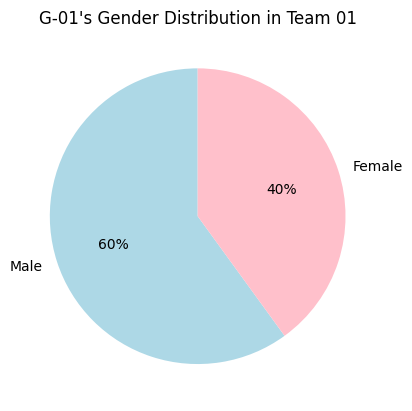

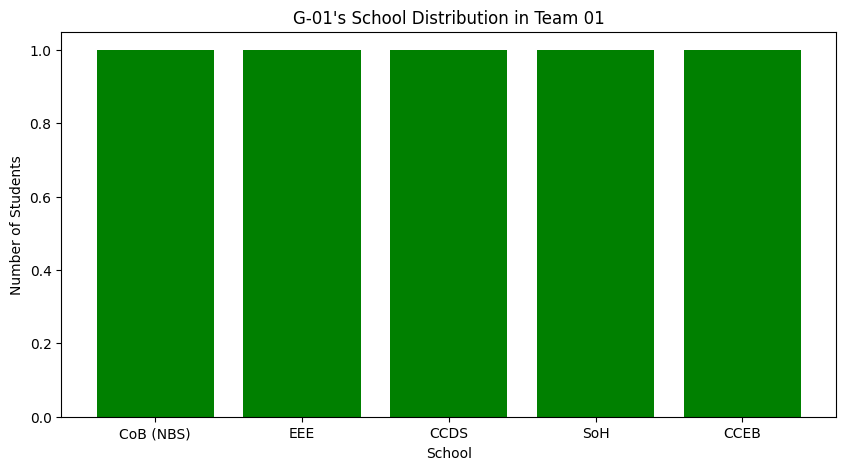

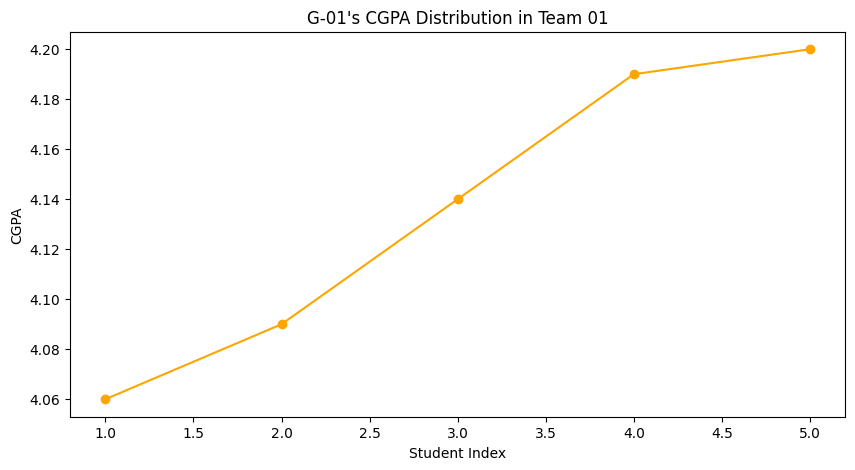

Visualizing data for Team 02 in G-01:


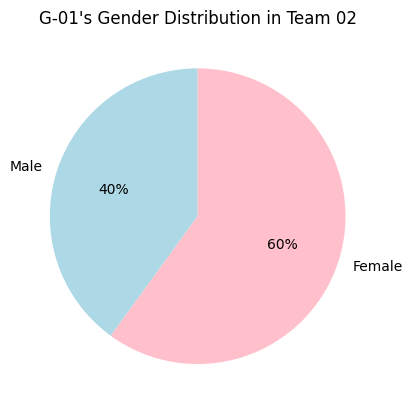

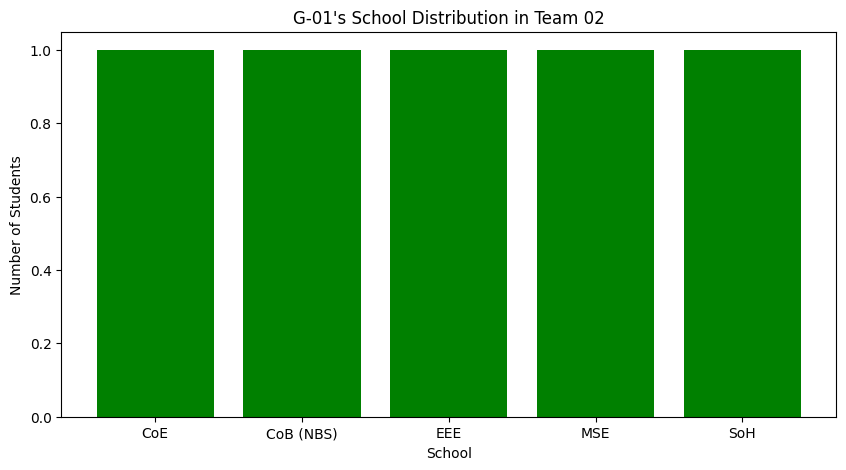

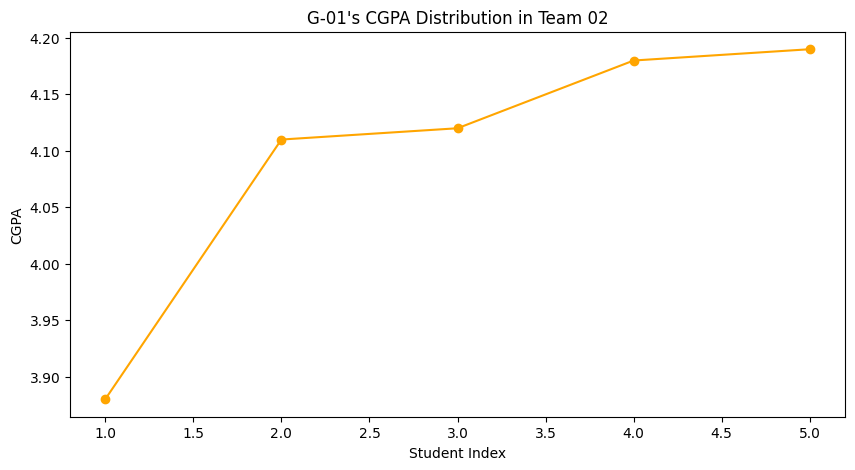

Visualizing data for Team 03 in G-01:


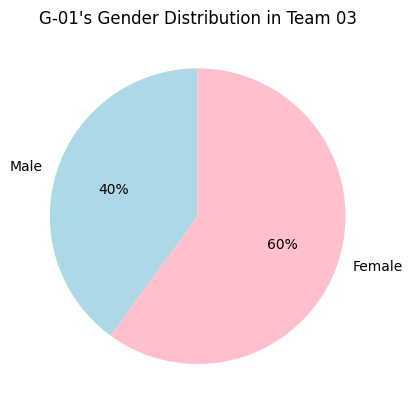

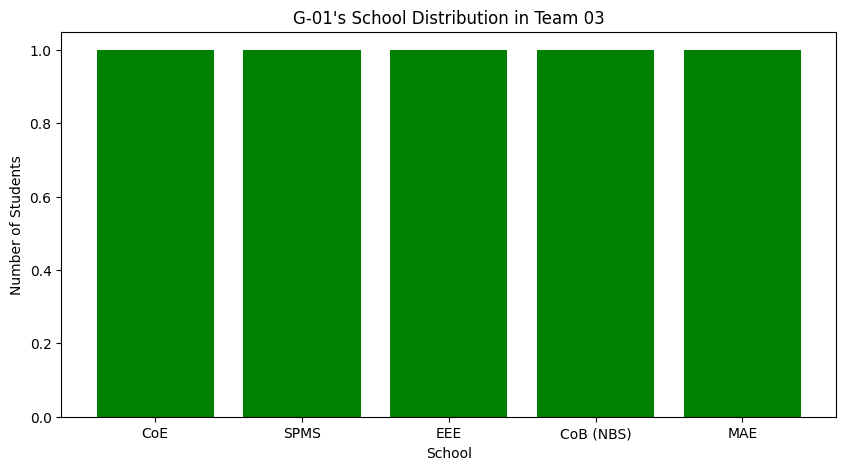

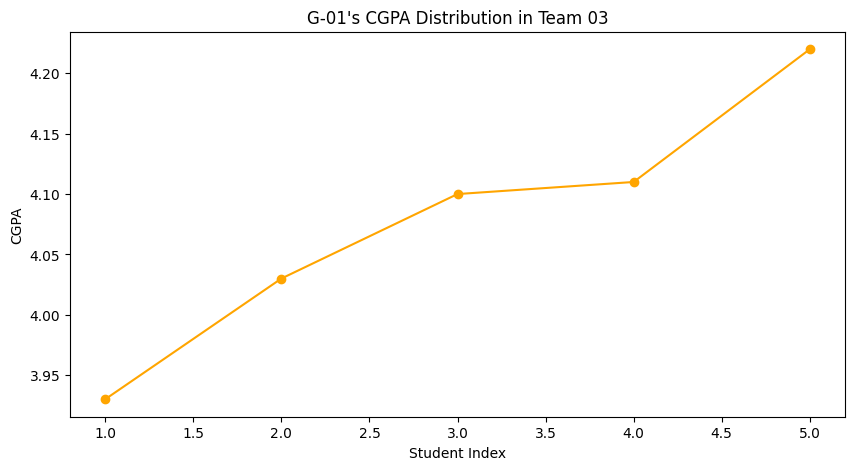

Visualizing data for Team 04 in G-01:


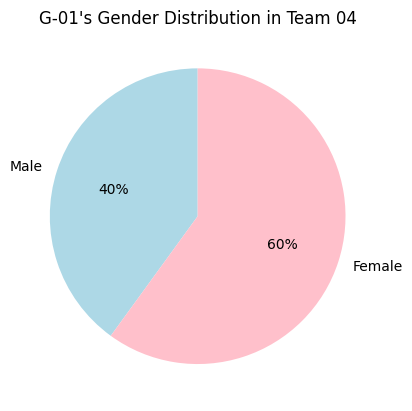

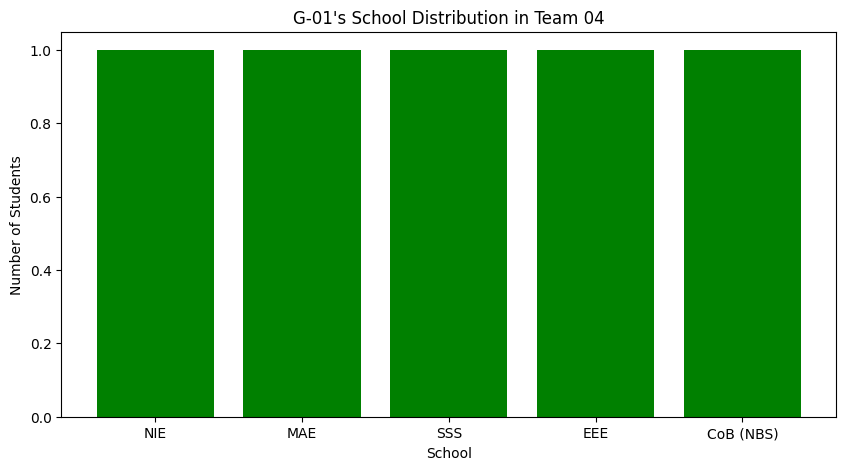

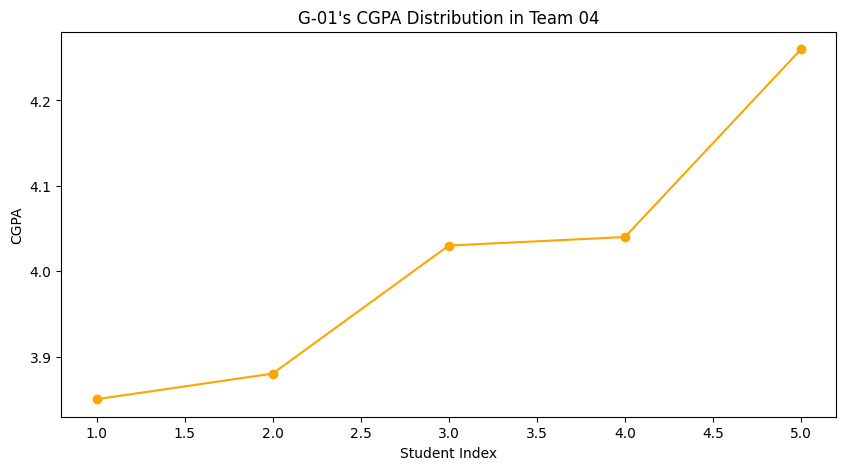

Visualizing data for Team 05 in G-01:


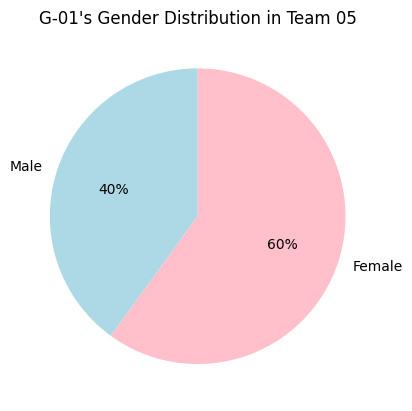

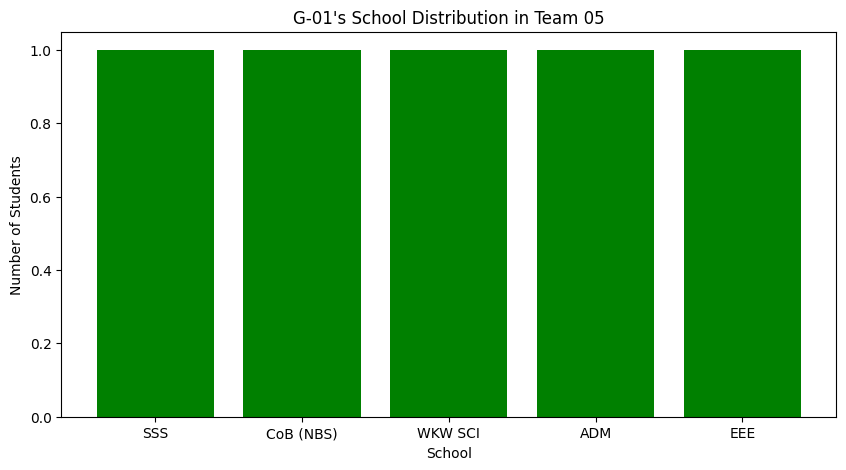

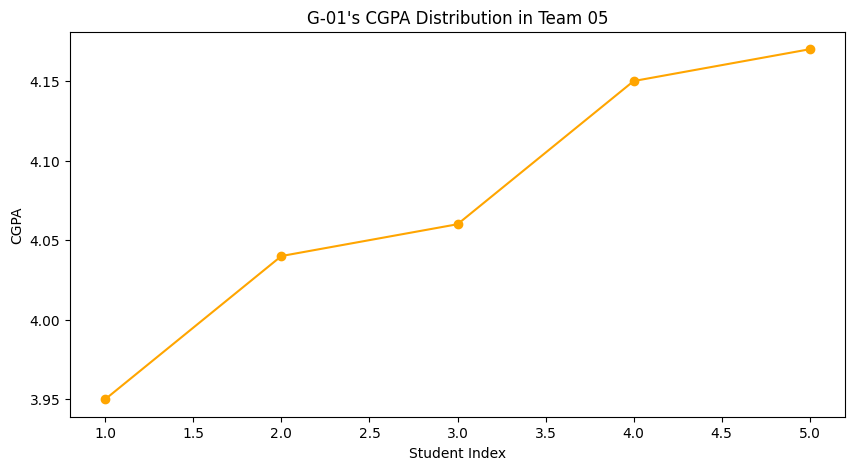

Visualizing data for Team 06 in G-01:


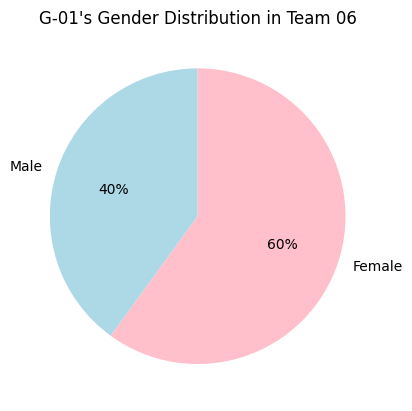

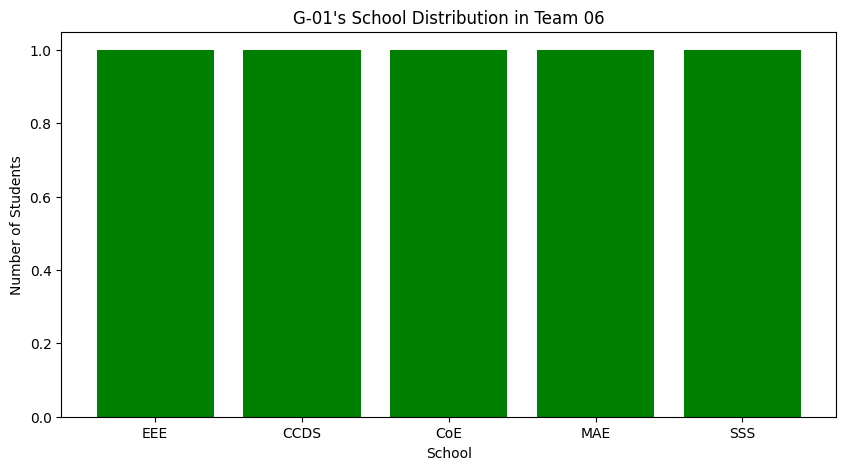

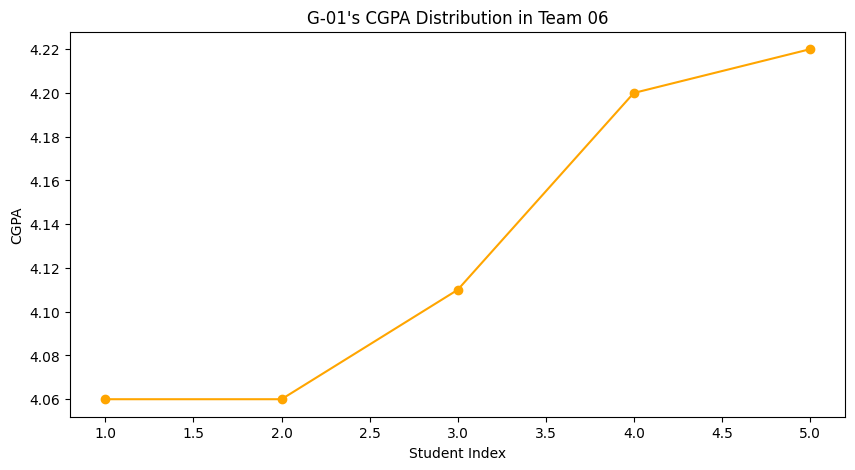

Visualizing data for Team 07 in G-01:


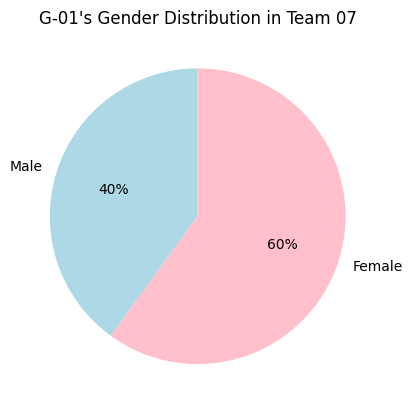

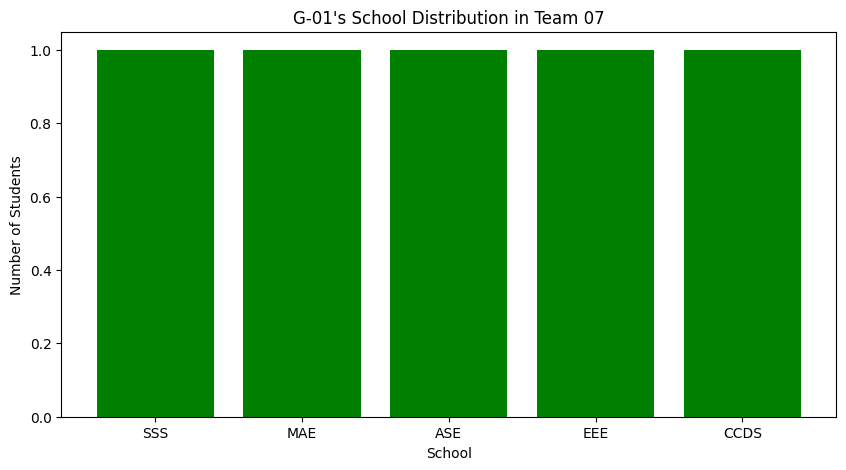

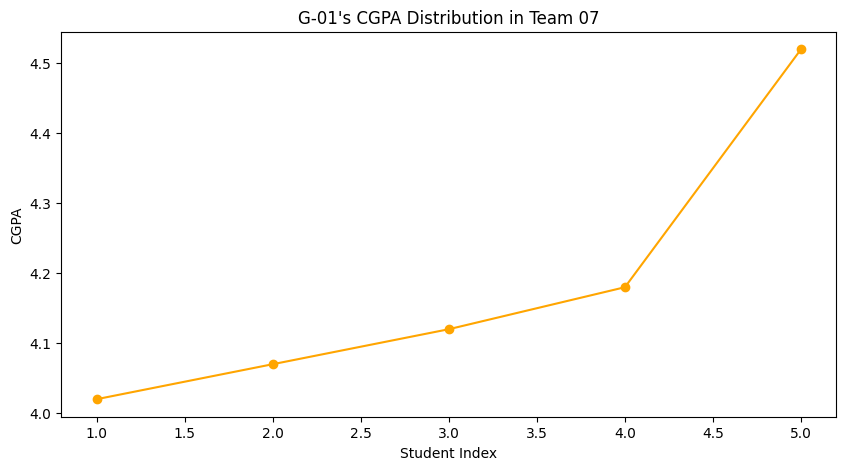

Visualizing data for Team 08 in G-01:


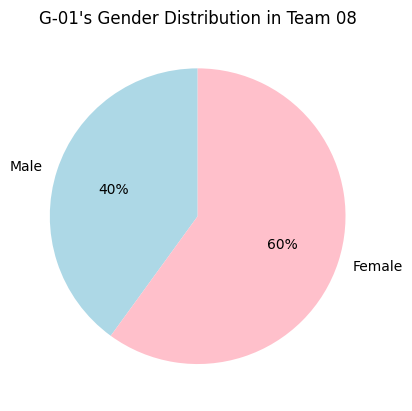

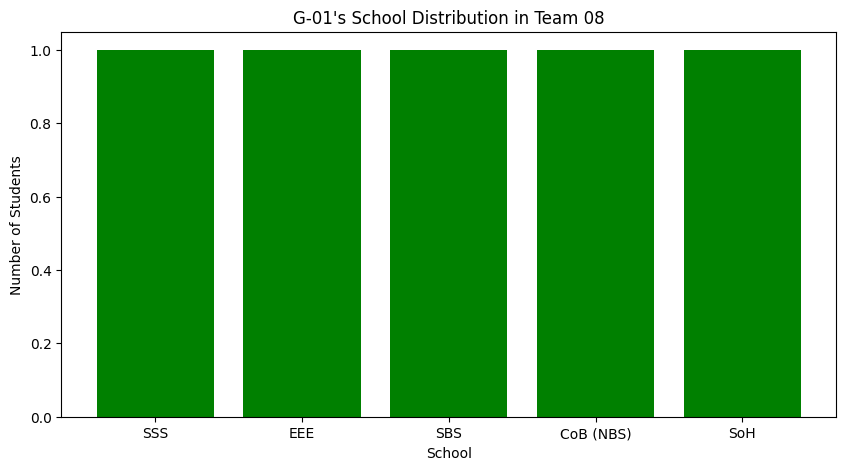

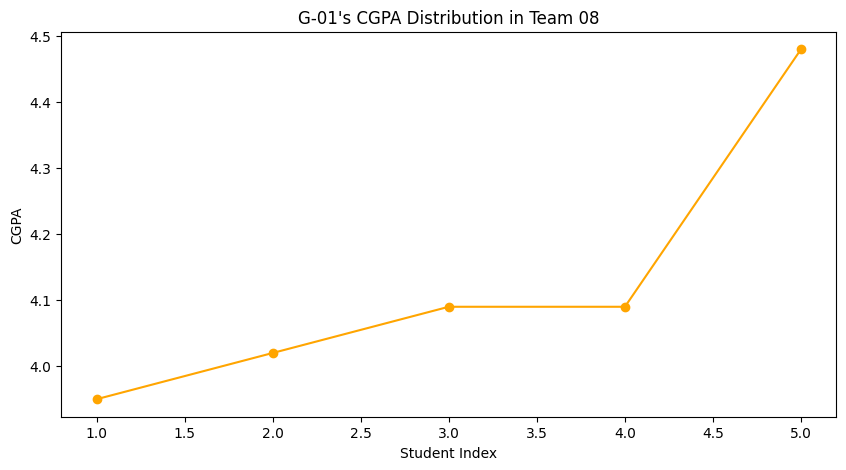

Visualizing data for Team 09 in G-01:


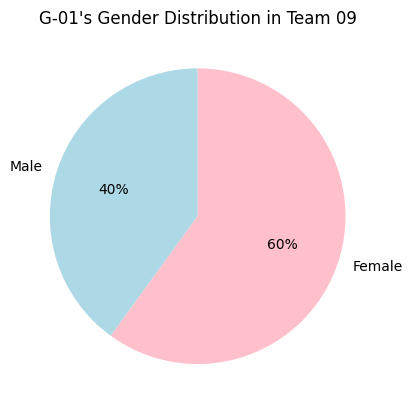

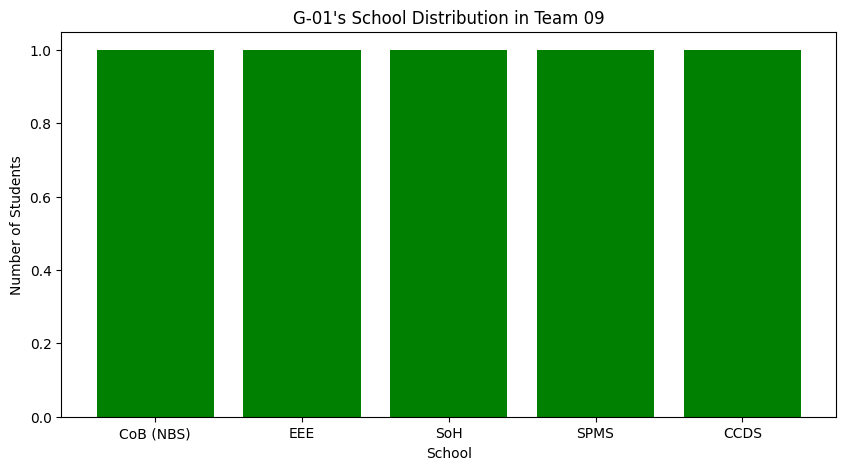

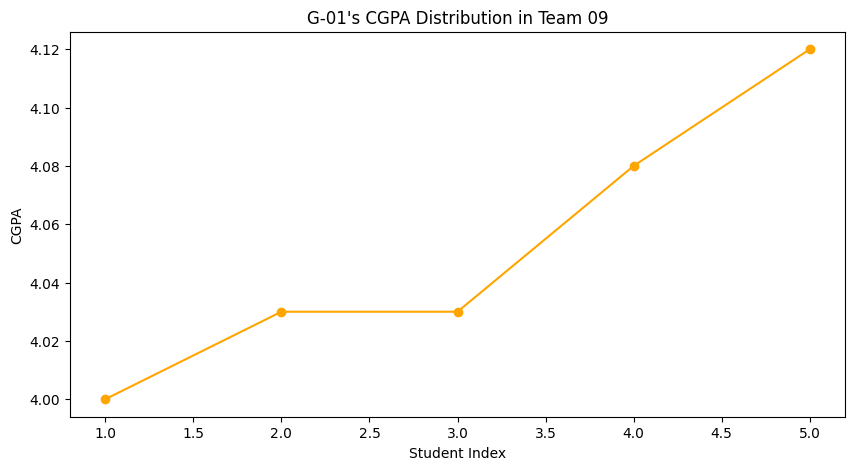

Visualizing data for Team 10 in G-01:


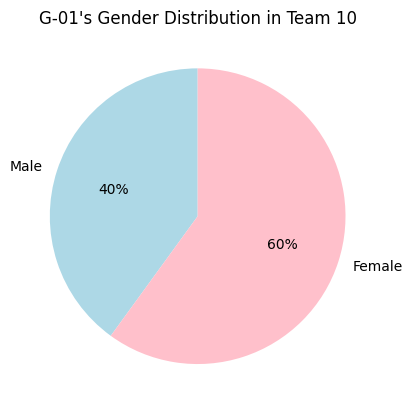

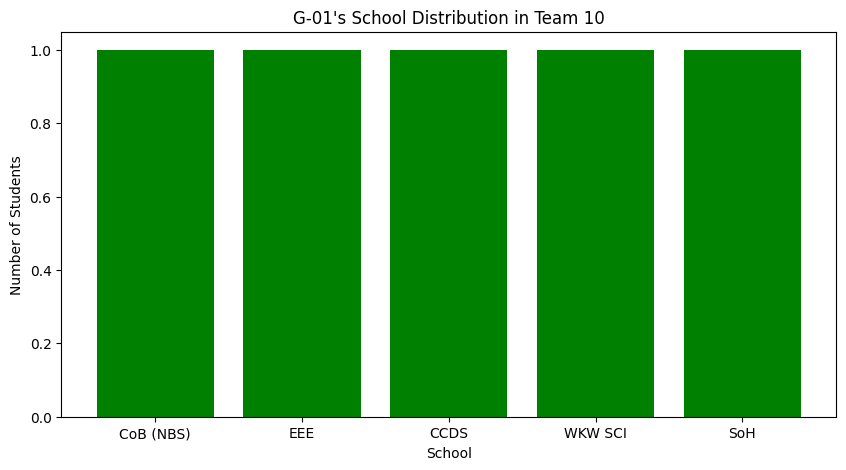

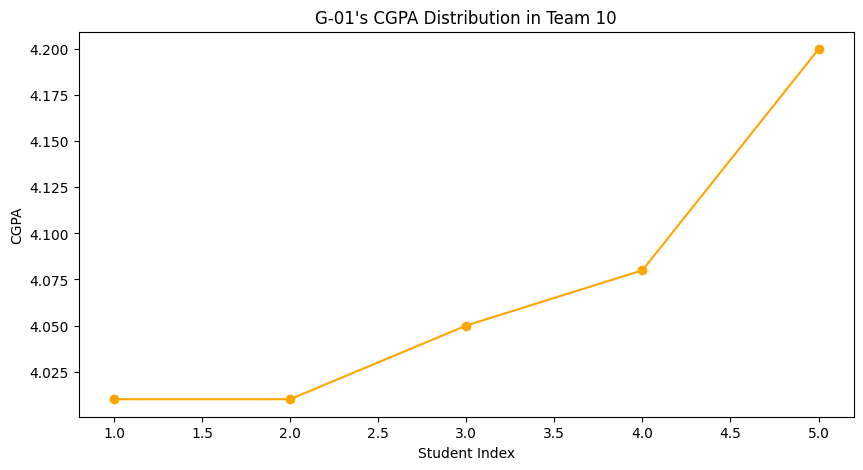

In [19]:
import matplotlib.pyplot as plt

# function that gets data from FCE1_Team4_SamuelChan.csv file
def Get_Sorted_data(Sorted_data):
    with open(Sorted_data, 'r') as file:
        Rows = file.readlines()
    # opens and reads the csv file into python
    header = Rows[0].strip().split(',')
    Sorted_data = []
    # header contains the 1st column of the csv file that contains the FCE1_Team4_SamuelChan.csv objects
    for row in Rows[1:]: # starts with index 1 as it ignores the data from the header
        values = row.strip().split(',')
        row_dictionary = {}
        for i in range(len(header)): # creates a dictionary containing the object headers as keys and values from Sorted_data as values for each row of FCE1_Team4_SamuelChan.csv file
            row_dictionary[header[i]] = values[i]
        Sorted_data.append(row_dictionary) # adds the dictionary containing each row of FCE1_Team4_SamuelChan.csv file into the list Sorted_data

    return Sorted_data

# Function that displays graphs for different objects and each team from the data retrieved from FCE1_Team4_SamuelChan.csv 
def plot_team_distributions(Sorted_data):
    Groups = sorted({row["Tutorial Group"] for row in Sorted_data}) # built-in function that sorts all the groups in ascending order from Sorted_data. 
    print("Available tutorial groups: G-01 to G-120") # displays all the available groups for user to choose from.
    Selected_Group = input("Enter the tutorial group that you want to visualize: ").strip() # allows user input to select a group, where whitespaces do not affect the input.
    
    # If statement to get data from a group from FCE1_Team4_SamuelChan.csv which matches the selected group
    if Selected_Group in Groups:
        Group_data = [row for row in Sorted_data if row["Tutorial Group"] == Selected_Group]

        # Finds the unique teams within the selected tutorial group. 
        Teams = sorted({row["Team Assigned"] for row in Group_data}) # sorts the teams in ascending order for the selected group.
        print(f"Available teams in {Selected_Group}:", end = " ") 
        for team in Teams:  # displays all the available teams for the selected group in one line (Which should be 10)
            print(team, end=", ")
        print()

        for team in Teams: # For loop to display graphs for the teams in the selected group chosen by user. 
            Team_data = [row for row in Group_data if row["Team Assigned"] == team] # List comprehension to get data from the teams from FCE1_Team4_SamuelChan.csv which matches the selected group.
            print(f"Visualizing data for {team} in {Selected_Group}:")

            # Pie chart plot for Gender Distribution:
            Gender_frequency = {"Male": 0, "Female": 0} # Dictionary that stores the counts of males and females per team for the selected group. 
            for row in Team_data:
                gender = row["Gender"].strip()
                if gender == "M":
                    Gender_frequency["Male"] += 1
                elif gender == "F":
                    Gender_frequency["Female"] += 1
            # Creates a pie chart displaying the males and females in percentages for each team of the selected group.
            plt.pie(Gender_frequency.values(), labels = Gender_frequency.keys(), autopct='%.0f%%', colors=['lightblue', 'pink'], startangle=90)
            plt.title(f"{Selected_Group}'s Gender Distribution in {team}")
            

            # Bar chart plot for School Distribution:
            School_frequency = {} # creates a dictionary to store the number of students in different schools per team for the selected group
            for row in Team_data:
                school = row["School"]
                if school in School_frequency:
                    School_frequency[school] += 1
                else:
                    School_frequency[school] = 1

            plt.figure(figsize=(10, 5)) # alters the size of graph for visualisation purposes.
            plt.bar(School_frequency.keys(), School_frequency.values(), color='green') # creates a bar chart for different schools per team for the selected group
            plt.title(f"{Selected_Group}'s School Distribution in {team}")
            plt.xlabel('School')
            plt.ylabel('Number of Students')
            

            # Line chart plot for CGPA Distribution:
            CGPA_data = sorted([float(row["CGPA"]) for row in Team_data if row["CGPA"]]) # Sorts CGPA scores in ascending order for graph visualisation
            plt.figure(figsize=(10, 5)) # modifies the size of graph for visualisation purposes
            plt.plot(range(1, len(CGPA_data) + 1), CGPA_data, marker='o', color='orange') # creates a line chart for the students' CGPA for each team of the selected group
            plt.title(f"{Selected_Group}'s CGPA Distribution in {team}")
            plt.xlabel('Student Index')
            plt.ylabel('CGPA')
            
            plt.show() # displays all the graphs for each team of the selected group.

    else:
        print(f"Group '{Selected_Group}' not found.")

# Data used from FCE1_Team4_SamuelChan.csv file.
Sorted_data = Get_Sorted_data('FCE1_Team4_SamuelChan.csv')
plot_team_distributions(Sorted_data)

# Challenges and Improvements

#### Planning Stage - Analysis of given data

> Challenges with the code 
- Handling Empty Results After Filtering
    - When the group_data list is empty (e.g., no matches for the tutorial group), the program could have continued, leading to errors in plotting or further data analysis.
    - Included an early exit check which prevents downstream issues by stopping execution gracefully when no matching data is found.

- Maintaining Header-Value Alignment 
    - Ensuring that the column headers align correctly with their respective values is crucial when converting rows to dictionaries.
    - The code explicitly maps the header list to each line's values using a loop: ensuring that each column header is properly associated with its value, maintaining data integrity. 

> Future improvements
- Dynamic Chart sizing based on data volume
    - Adjust the figsize dynamically based on the number of data points or unique values in the dataset as this ensures that charts remain readable whether the dataset is small or large, adapting to the data scale.
    - Prevents cluttered visualizations, improving interpretation and presentation quality.

#### Implementation Stage
> Challenges with the first version of code
- Original idea was to create permutations for teams and compare their variances to the optimum variance to get the teams where difference between team variance and optimum vairance is the least
- Permutation function was time and space inefficient, thus needed a change in logic

> Current implementation
- Current 2D array is unique for a 5x10 array, code would not be feasible for future changes in tutorial group size or team size would 

- The code assumes that all students have valid gender, college, and GPA data, so missing or invalid data in any of these fields could lead to unexpected errors
    - Solved using Exception to skip line that raises exception 


#### Evaluation Stage
> Challenges with code

- At the start, the idea was to collect the sorted data done by the algorithm by using dataframes to store the sorted data, but without using extended libraries, it ended up being complex to achieve. Then decided to use a function using "with open( , r)" (File management codes) to read the sorted data from the team_assignment.csv file and store it into a list which is further used for graph data visualisation.

- Another issue encountered was displaying the graphs in a correct manner. When visualising the bar chart displaying the schools for each team, the labels on the x-axis displaying every team was too narrow, which made it very difficult to identify what school corresponds to each bar. 
- To tackle this issue, the following code was implemented: plt.figure(figsize=(10, 5)) , this altered the size of the graph, which allowed more space for the x-axis to be labeled correctly.

> Improvements

- To improve the efficiency of the code that displays the graphs for the sorted data is to implement validation for user input.
- When the user is asked to enter a group to select, the code only allows the user to chose one group at a time. I decided to do this as each group contains 10 teams, so by displaying several groups at a time it can be difficult to visualise each team effectively. However, in practice, the user should be able to see as many groups as wanted at a time, whether it is visually pratical or not.

- Another improvement to make for input validation, is to validate the input for case sensitivity, as at the moment, the code is case sensative.
- For example, for group G-10, if user enters g-10, there will be an error message displayed, meaning that group G-10 is not dislayed. By improving the code to not be case sensitive, the user will be able to choose the groups for lower and upper case without getting an error message.

# Appendix B: USE OF AI TOOL(S) IN PROJECT WORK 

> PDF under assets folder, as well as in the link

> https://docs.google.com/document/d/1JXBvUtxRll_0rA6-STpsAsDkWUENMP15fmrHD6arWxw/edit?pli=1&tab=t.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb8486f0-686a-4917-9bb7-beee881ac408' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>